In [11]:
from SubsidieModel import SubsidieModel
from SubsidieModel import AdoptionAgent
from VermogenInkomen import genereer_random_vermogen




In [12]:
from SubsidieModel import gemiddelde_leeftijd_auto

model = SubsidieModel()

leeftijd = gemiddelde_leeftijd_auto(model)
print(leeftijd)
for i in range(13):
    model.step()

leeftijd = gemiddelde_leeftijd_auto(model)
print(leeftijd)


Hij wordt aangeroepen
Hij is gereset
48.27060737527115
Volle pot
59.963123644251624


In [13]:
cell_0_0 = model.grid.get_cell_list_contents([(0, 0)])

if cell_0_0:
    print("Agent aanwezig op cel (1, 1)")
else:
    print("Geen agent aanwezig op cel (1, 1)")

for agent in model.schedule.agents:
    position = agent.pos
    agent_type = agent.agent_type
    print(f"Agent Type at position ({position[0]} , {position[1]}): {agent_type}")

Agent aanwezig op cel (1, 1)
Agent Type at position (27 , 18): TypeAdopter.EARLY_MAJORITY
Agent Type at position (41 , 8): TypeAdopter.LATE_MAJORITY
Agent Type at position (40 , 25): TypeAdopter.EARLY_MAJORITY
Agent Type at position (49 , 22): TypeAdopter.EARLY_MAJORITY
Agent Type at position (31 , 26): TypeAdopter.EARLY_MAJORITY
Agent Type at position (1 , 6): TypeAdopter.LAGGARDS
Agent Type at position (37 , 47): TypeAdopter.EARLY_MAJORITY
Agent Type at position (16 , 48): TypeAdopter.LAGGARDS
Agent Type at position (43 , 26): TypeAdopter.EARLY_MAJORITY
Agent Type at position (37 , 3): TypeAdopter.EARLY_MAJORITY
Agent Type at position (12 , 14): TypeAdopter.EARLY_MAJORITY
Agent Type at position (8 , 33): TypeAdopter.LATE_MAJORITY
Agent Type at position (40 , 16): TypeAdopter.EARLY_MAJORITY
Agent Type at position (30 , 35): TypeAdopter.LAGGARDS
Agent Type at position (26 , 36): TypeAdopter.EARLY_ADOPTER
Agent Type at position (48 , 39): TypeAdopter.EARLY_MAJORITY
Agent Type at positio

In [14]:
from SubsidieModel import TypeAdopter, count_type

a = count_type(model, TypeAdopter.INNOVATOR)
print(a)
b = count_type(model, TypeAdopter.EARLY_ADOPTER)
print(b)
c = count_type(model, TypeAdopter.EARLY_MAJORITY)
print(c)
d = count_type(model, TypeAdopter.LATE_MAJORITY)
print(d)
e = count_type(model, TypeAdopter.LAGGARDS)
print(e)

# Totaal aantal agents
total = a + b + c + d + e
print(total)

63
338
847
851
401
2500


In [15]:
for i in range(13):
    model.step()
    

model_data = model.datacollector.get_model_vars_dataframe()

print(model_data)


Volle pot
    Gemiddelde belangstelling  Aantal gekochte EV  Aantal gekochte FBA  \
0                    0.491426                   1                    0   
1                    0.491426                   7                    4   
2                    0.491426                  14                    9   
3                    0.491426                  28                   10   
4                    0.491426                  36                   11   
5                    0.491426                  43                   14   
6                    0.491426                  53                   17   
7                    0.491426                  66                   20   
8                    0.491426                  79                   22   
9                    0.491426                  87                   25   
10                   0.491426                 100                   27   
11                   0.582986                 114                   29   
12                   0.49142

In [16]:
agent_data = model.datacollector.get_agent_vars_dataframe()
print(agent_data)


                   Type Agent  Belangstelling  leeftijd auto  Vermogen Agent
Step AgentID                                                                
1    (45, 39)   LATE_MAJORITY           0.406             41      150.310693
     (47, 44)  EARLY_MAJORITY           0.524             43    54887.198391
     (6, 40)    LATE_MAJORITY           0.406             49    77702.953377
     (5, 5)          LAGGARDS           0.374             71     -187.500000
     (28, 34)        LAGGARDS           0.374              1    75604.051480
...                       ...             ...            ...             ...
26   (13, 6)    LATE_MAJORITY           0.406             63     4037.500000
     (33, 40)  EARLY_MAJORITY           0.524             26    92199.126941
     (45, 39)   LATE_MAJORITY           0.406             66     7337.810693
     (21, 15)        LAGGARDS           0.374             26    15340.601530
     (11, 7)   EARLY_MAJORITY           0.524             95     3062.500000

In [17]:

agent_ID = (10,10)


agent_data_single = agent_data.xs(agent_ID, level="AgentID")

print(agent_data_single)


          Type Agent  Belangstelling  leeftijd auto  Vermogen Agent
Step                                                               
1     EARLY_MAJORITY        0.524000             39    67199.225859
2     EARLY_MAJORITY        0.524000             40    68111.725859
3     EARLY_MAJORITY        0.524000             41    69024.225859
4     EARLY_MAJORITY        0.524000             42    69936.725859
5     EARLY_MAJORITY        0.524000             43    70849.225859
6     EARLY_MAJORITY        0.524000             44    71761.725859
7     EARLY_MAJORITY        0.524000             45    72674.225859
8     EARLY_MAJORITY        0.524000             46    73586.725859
9     EARLY_MAJORITY        0.524000             47    74499.225859
10    EARLY_MAJORITY        0.524000             48    75411.725859
11    EARLY_MAJORITY        0.524000             49    76324.225859
12    EARLY_MAJORITY        0.626939             50    77236.725859
13    EARLY_MAJORITY        0.524000            

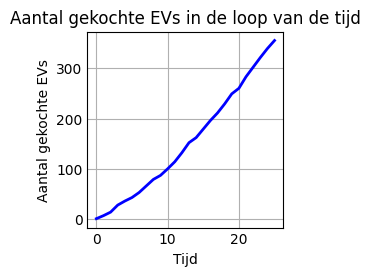

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# Assuming model_data is defined somewhere earlier in your code
# Haal het aantal gekochte EV's uit de modelgegevens
aantal_gekochte_evs = model_data['Aantal gekochte EV'].tolist()

y = aantal_gekochte_evs
# Maak een array voor de tijd (stappen)
x = np.arange(len(aantal_gekochte_evs))

# Plot
fig, ax = plt.subplots()

# Plot het aantal gekochte EV's in de loop van de tijd
ax.plot(x, aantal_gekochte_evs, linewidth=2.0, color='blue')  # Use x as time steps

ax.set_xlabel('Tijd')
ax.set_ylabel('Aantal gekochte EVs')
ax.set_title('Aantal gekochte EVs in de loop van de tijd')

plt.show()


In [19]:
for i in range(108):
    model.step()
    

model_data = model.datacollector.get_model_vars_dataframe()

print(model_data)



Volle pot
Volle pot
Volle pot
Volle pot
Volle pot
Volle pot
Volle pot
     Gemiddelde belangstelling  Aantal gekochte EV  Aantal gekochte FBA  \
0                     0.491426                   1                    0   
1                     0.491426                   7                    4   
2                     0.491426                  14                    9   
3                     0.491426                  28                   10   
4                     0.491426                  36                   11   
..                         ...                 ...                  ...   
129                   0.491426                1041                  840   
130                   0.491426                1045                  840   
131                   0.491426                1047                  853   
132                   0.491426                1048                  868   
133                   0.491426                1054                  868   

     Percentage huishoudens i

In [20]:
import pandas as pd

selected_data = pd.DataFrame()

for i in range(1, 121, 12):  # Start vanaf 1 en stap met 12
    model_data_i = model.datacollector.get_model_vars_dataframe().iloc[[i]]
    selected_data = pd.concat([selected_data, model_data_i])

print(selected_data)


     Gemiddelde belangstelling  Aantal gekochte EV  Aantal gekochte FBA  \
1                     0.491426                   7                    4   
13                    0.491426                 152                   35   
25                    0.491426                 355                  105   
37                    0.491426                 572                  176   
49                    0.491426                 642                  255   
61                    0.491426                 699                  315   
73                    0.491426                 744                  423   
85                    0.491426                 775                  487   
97                    0.491426                 832                  625   
109                   0.491426                 910                  730   

     Percentage huishoudens in bezit auto  Percerntage EV's van Auto's  
1                                  0.7376                     0.003796  
13                          